In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from tqdm import tqdm
from transformers import DistilBertTokenizer

news = 'liberty'
figsize = (10, 8)

In [7]:
def show_data_info(df):
    print(f'Total: {len(df)}')
    df['Category'].value_counts().plot(kind='bar',
                                       figsize=figsize)
    plt.show()

def get_tokenized_context_info(df, tokenizer):
    tokenized_titles = []
    tokenized_contents = []
    with tqdm(total=len(df)) as pbar:
        for title, content in zip(df['Title'], df['Content']):
            tokenized_title = tokenizer.tokenize(title)
            tokenized_titles.append(tokenized_title)

            tokenized_content = tokenizer.tokenize(content)
            tokenized_contents.append(tokenized_content)
            pbar.update(1)
    titles_len = [len(title) for title in tokenized_titles]
    contents_len = [len(content) for content in tokenized_contents]

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.hist(titles_len, bins=20)
    ax1.title.set_text('Tokenized Title Lengths')

    ax2.hist(contents_len, bins=20)
    ax2.title.set_text('Tokenized Content Lengths')
    plt.show()
    
    return tokenized_titles, tokenized_contents

In [11]:
# Load raw data
data = np.load('./data/train_raw.npz', allow_pickle=True)
columns = ['Date', 'Title', 'Content', 'Img', 'Category', 'URL', 'ID']
df = pd.DataFrame(data[news], columns=columns)

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

Total: 5546


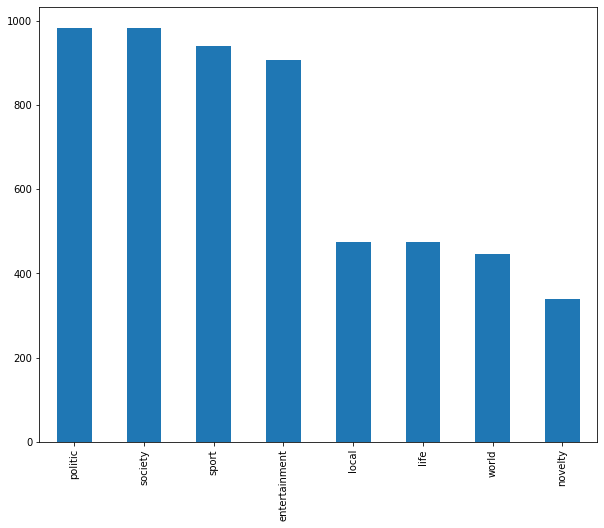

100%|██████████| 5546/5546 [00:08<00:00, 661.88it/s]


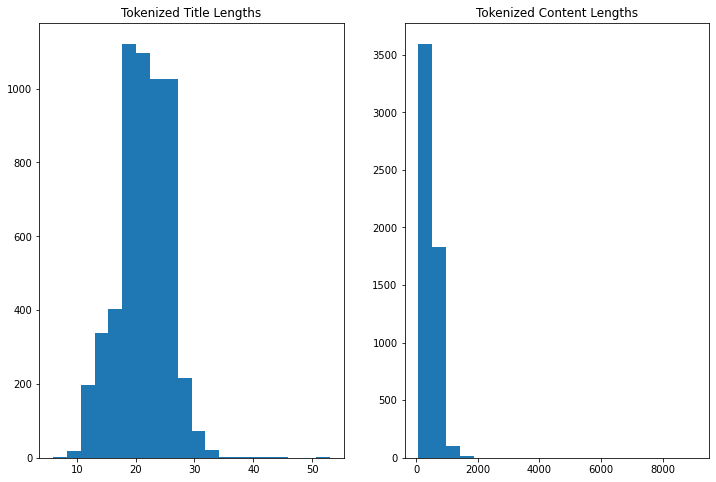

In [12]:
show_data_info(df)
tokenized_titles, tokenized_contents = get_tokenized_context_info(df, tokenizer)